# Bootcamp 2021 - spotkanie 2
Regresja liniowa na przykładzie przewidywania cen nieruchomości

<h1> Part 1 </h1> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Wczytujemy dane 
estate_df = pd.read_csv (r'data/Real_estate_dataset.csv')
pd.DataFrame(estate_df)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [2]:
#Usuwamy niepotrzebną kolumnę
estate_df.drop("No", axis=1, inplace=True)

In [3]:
#podział na zmienne i cel
X = estate_df.drop(estate_df.columns[6],axis=1)
y = estate_df.iloc[:, 6]

#zmiana z pandas DataFrame na Numpy ndarray - żeby się nauczyć :)
X=X.values
print(X)

[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 ...
 [2013.25      18.8      390.9696     7.        24.97923  121.53986]
 [2013.         8.1      104.8101     5.        24.96674  121.54067]
 [2013.5        6.5       90.45606    9.        24.97433  121.5431 ]]


In [4]:
#normalizacja - dzielimy wszystko przez maksymalną warotść żeby nie operować na dużych liczbach
max_values = np.max(X,axis=0)
for i in range(0, X.shape[1]):    
    X[:,i]=X[:,i]/max_values[i]
    
print(X)

[[0.99966925 0.73059361 0.01308239 1.         0.99873634 0.99978588]
 [0.99966925 0.44520548 0.0472555  0.9        0.9986308  0.99977987]
 [1.         0.30365297 0.08661879 0.5        0.99891543 0.99981607]
 ...
 [0.99983462 0.42922374 0.06026022 0.7        0.99858642 0.99978275]
 [0.99971047 0.18493151 0.0161544  0.5        0.99808712 0.99978942]
 [0.99995878 0.14840183 0.01394201 0.9        0.99839054 0.9998094 ]]


In [5]:
#inicjujemy bete na 0 
beta = np.zeros(X.shape[1])
print(beta)

[0. 0. 0. 0. 0. 0.]


<h3>Funkcja straty</h3>
<center><h2>

${J} = \frac{1}{n} \sum \limits _{i=1} ^{n} ({y}_{i} - pred_{i})^2$

</h2></center>


In [6]:
#definiujemy funkcję straty
def cost_function(X, y, beta):
    y1 = beta*X
    y1=np.sum(y1, axis=1) 
    return sum((y1-y)**2)/(X.shape[0])

<h3>Pochodna cząstkowa funkcji straty</h3>
<center><h2>

$\frac{\partial{X}_i}{\partial J} = \frac{2}{n} \sum \limits _{i=1} ^{n} (pred_{i})^{'} ({y}_{i} - pred_{i})$

</h2></center>

Gdzie $(pred_{i})^{'}$ to pochodna cząstkowa względem $\beta_{i}$ z wielomianu $(pred) = \beta _{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$ 

In [7]:
def gradient_descent(X, y, beta, alpha, i):
    
    # X - macierz X z danymi wejściowymi
    # y - wektor z danymi wyjściowymi
    # beta - wektor z przewidywanymi wartościami beta_0, beta_1 etc
    # alpha - learning rate
    # i - liczba iteracji którą będziemy wykonywać
    
    J = [] 
    for k in range(i):
        
        # liczymy przewidywaną wartość y, poprzez pomnożenie wektora beta przez macierz X
        y1 = beta*X
        y1 = np.sum(y1, axis=1)
        
        for c in range(0, X.shape[1]):
            
            # pochodna cząstkowa z X_c
            deriv = sum((y1-y)*X[:,c])/(2*len(X))
            
            # regresja liniowa - zmieniamy wektor beta
            beta[c] = beta[c] - alpha*deriv
            # print(beta[c])
                                        
        # patrzymy jak nam poszło, czyli liczymy funkcje straty
        j = cost_function(X, y, beta)
                                        
        # dodajemy wynik do wektora J, żeby móc zobaczyć jak się zmienia funkcja straty
        J.append(j)
    return J, j, beta

In [68]:
J, j, beta = gradient_descent(X, y, beta, 0.05, 1000)

In [69]:
# liczymy przewidywane wartości dla wszystkich danych - porównamy je z prawdziwymi
y_hat = beta*X
y_hat = np.sum(y_hat, axis=1)

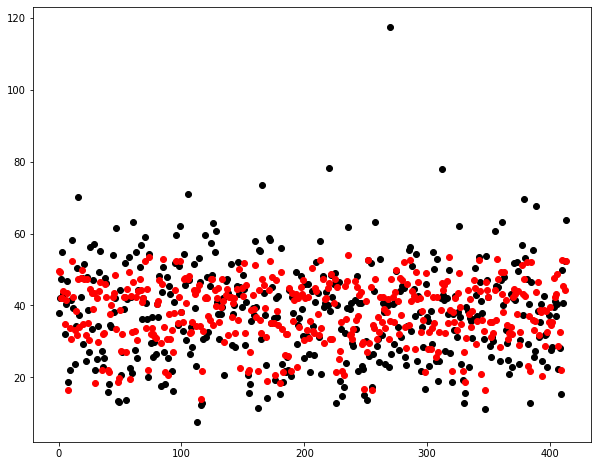

In [70]:
plt.figure(figsize=(10, 8))
plt.scatter(x=list(range(0, X.shape[0])),y= y, color='black')         
plt.scatter(x=list(range(0, X.shape[0])), y=y_hat, color='red')
plt.show()

In [72]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(0, 1000)), J)     


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/tuco/ws_code/python/Bootcamp2021/bootcamp_env/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/tuco/ws_code/python/Bootcamp2021/bootcamp_env/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

<Figure size 720x576 with 0 Axes>

In [12]:
#to samo można zastąpić jedną linijką używając biblioteki sklearn 
reg = LinearRegression().fit(X, y)

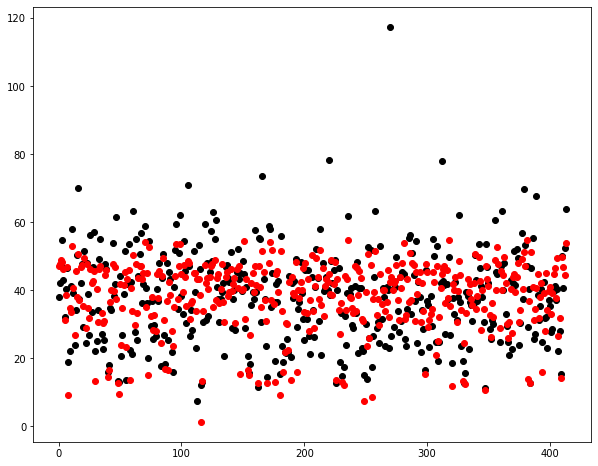

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(x=list(range(0, X.shape[0])),y= y, color='black')         
plt.scatter(x=list(range(0, X.shape[0])), y=reg.predict(X), color='red')
plt.show()

<h1> Part 2 - przykłady regresji wielomianowej </h1>

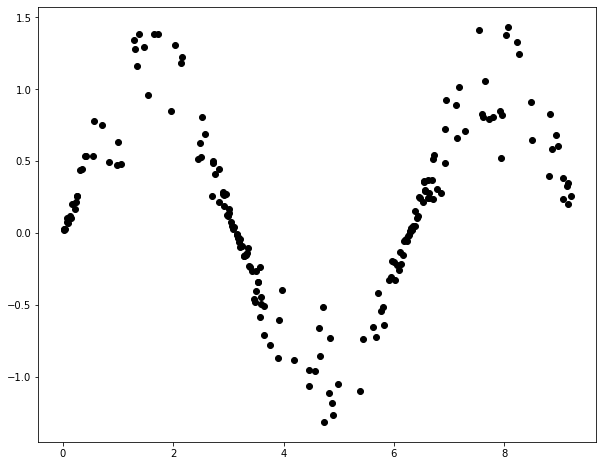

In [75]:
sin_approx = pd.read_csv(r'data/sinus_approx.csv')
sin_approx = sin_approx.values

X=(sin_approx[:, 0]).reshape(-1,1)
Y=sin_approx[:,1]

plt.figure(figsize=(10, 8))
plt.scatter(x=X, y=Y, color='black')         

In [15]:
def polynomial_regression(degree, X, Y):
    poly = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    poly.fit(X, Y)
    plt.figure(figsize=(10, 8))
    plt.scatter(X, Y, color="black")
    plt.plot(X, poly.predict(X), color="red")
    plt.show()

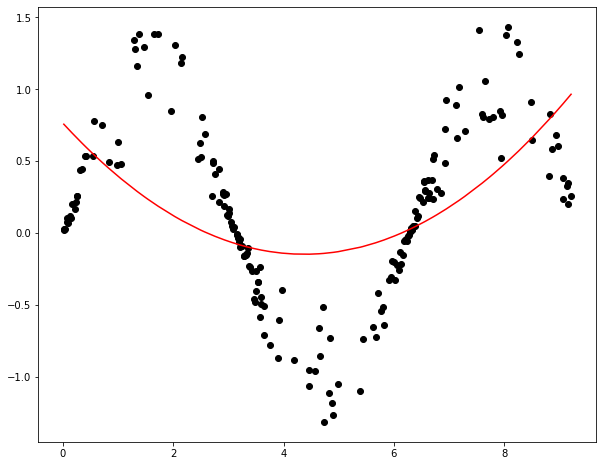

In [16]:
#underfitting
polynomial_regression(2, X, Y)

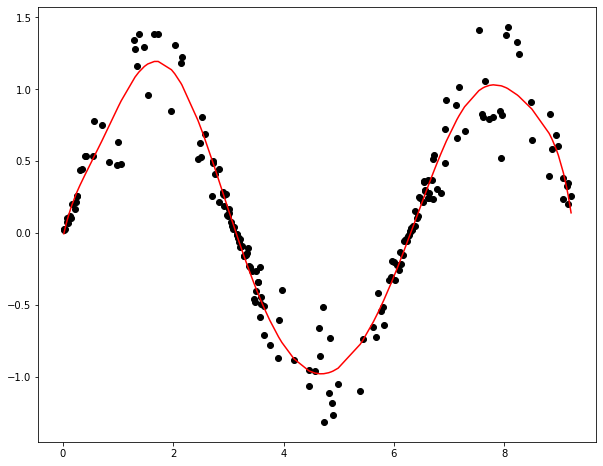

In [17]:
#okej
polynomial_regression(10, X, Y)

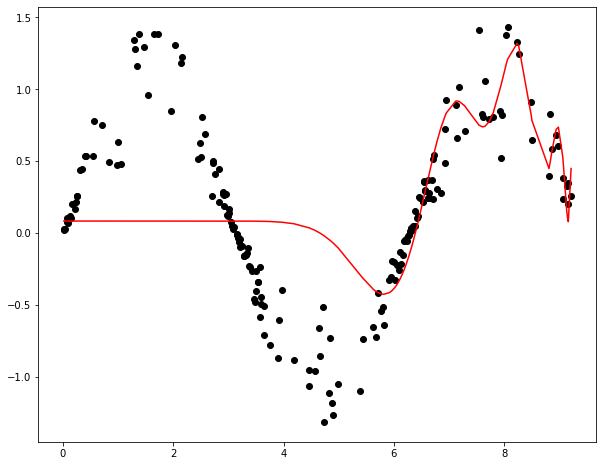

In [18]:
#overfitting
polynomial_regression(30, X, Y)